# Kalman Filter Seminar
Imagine that we want to estimate the translational velocity, $x_t$ , of a car by using the gas pedal, which provides information regarding the acceleration, $u_t$ , plus some noise, $\epsilon_t$ . The propagation model is $x_t = x_{t−1} +\Delta t·(u_t +\epsilon_t )$, where $\epsilon_t \sim \mathcal{N}(0,M)$, and covariance $M = 10$.

All relevant data for this task is contained in the *t4* file.
You may want to use numpy $\texttt{load}$ function.
Some parameters are included there too, such as $\Delta t = 0.1$, $x_0=0$, $\Sigma_0 = 0$ (vehicle stopped).

## 1) Open loop estimation
Unfortunately for us, there is a difference between the controls that we have commanded and the controls that the car has actually executed. This uncertainty is expressed in the form of corrupted controls by the r.v. $\epsilon_t$. Calculate the state trajectory of $x_t$ just by considering the noisy controls  $u_t+\epsilon_t$ provided. Write the equations and plot the results, that is, $\bar{\mu}_t$ and $\pm 1-sigma$. Compare it to the real state $x_t$ of the velocity. Comment on the results.

*Hint:* this a covariance projection problem. The noise should be projected too.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from ciplot import ciplot
data = np.load('data')
print(data.files)

['t', 'dt', 'N', 'M', 'Q', 'u', 'z', 'x_real', 'x_0', 'P_0']


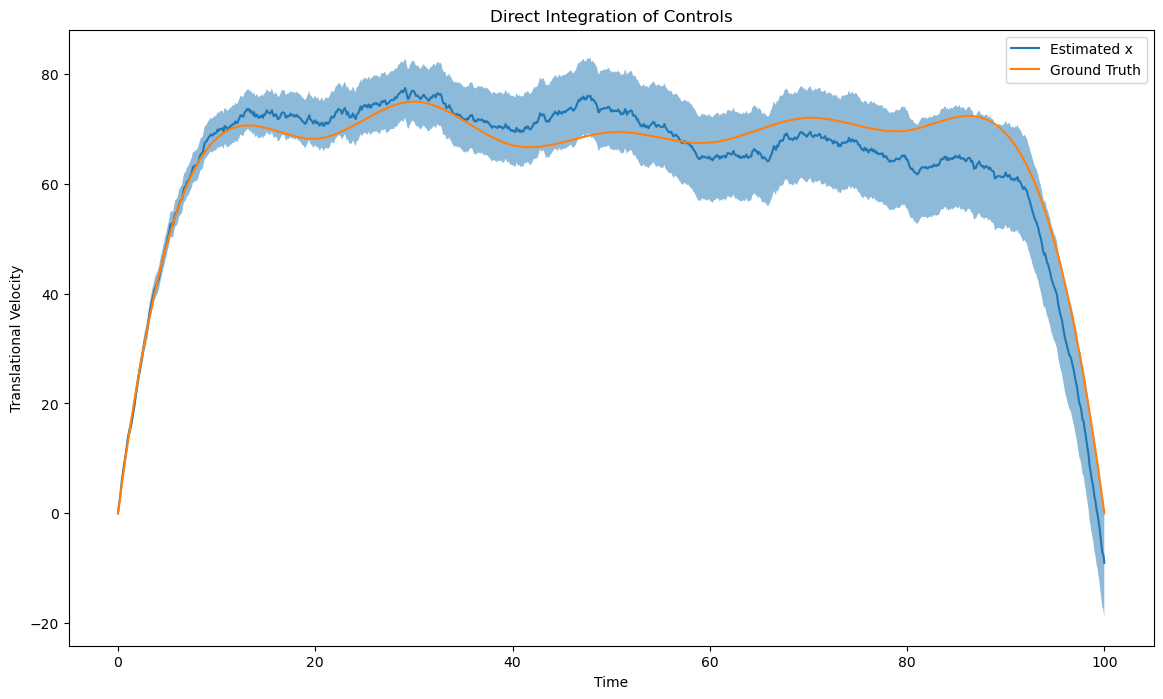

In [2]:
N = data['N']
dt = data['dt']
R = data['M']*dt*dt 
t = data['t']
u = data['u']
x_real = data['x_real']
x_pred = np.zeros(N)
P_pred = np.zeros(N)
x_pred[0] = data['x_0']
P_pred[0] = data['P_0']

for i in range(1, N):
    x_pred[i] = x_pred[i - 1] + dt * u[i - 1]
    P_pred[i] = P_pred[i - 1] + R
sigma = np.sqrt(P_pred)

minus_sigma = x_pred - sigma
plus_sigma = x_pred + sigma
plt.figure(figsize=(14,8))
handles = ciplot(t, x_pred, minus_sigma, plus_sigma, x_real)


plt.title('Direct Integration of Controls')
plt.legend(handles, ['Estimated x', 'Ground Truth'])
plt.xlabel('Time')
plt.ylabel('Translational Velocity')
plt.show()

## 2) Adding observations
In order to circumvent the drifting issue (this might be a hint for A), we need to observe our state $x_t$. Our observations are the integration over a time step of an accelerometer {\em perfectly} aligned with the car's translation direction. The observation model $z_t = x_t + \delta_t$, where $\delta_t \sim \mathcal{N}(0,Q)$, being $Q = 5$. Plot the raw observations and compare them with the real state $x_t$.

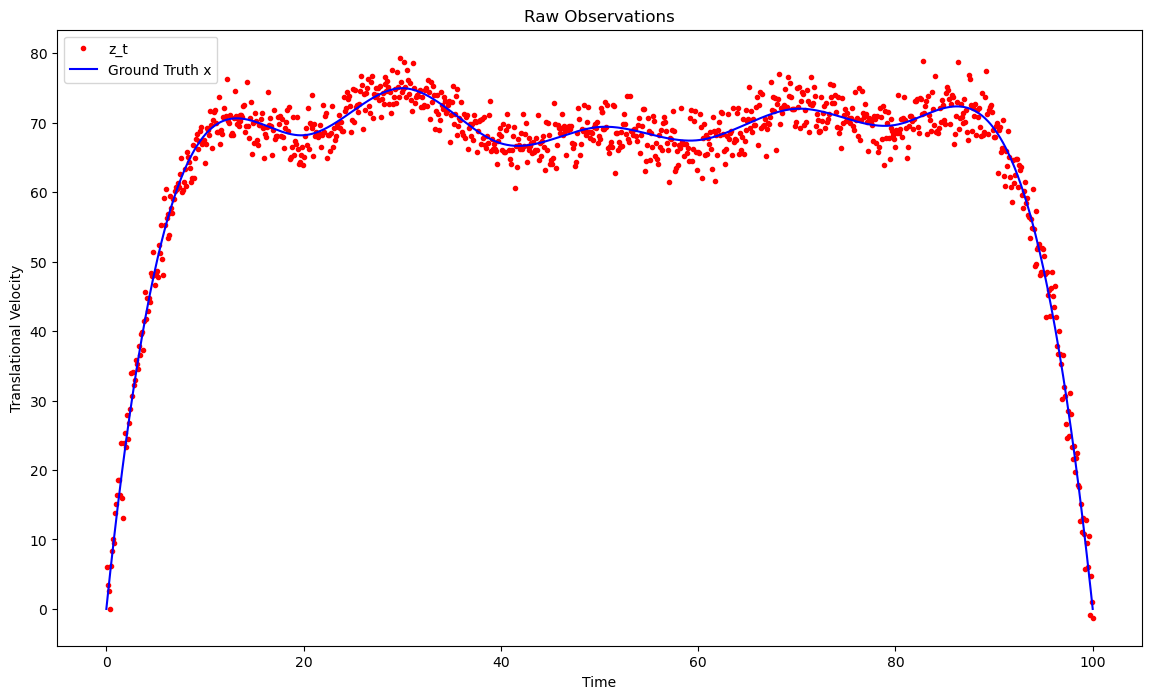

In [3]:
z = data['z']
plt.figure(figsize=(14,8))
h1, = plt.plot(t[1:], z, '.r', linewidth=2)
h2, = plt.plot(t, x_real, 'b')

plt.title('Raw Observations')
plt.legend([h1, h2], ['z_t', 'Ground Truth x'])
plt.xlabel('Time')
plt.ylabel('Translational Velocity')
plt.show()

## KF integration
Implement the Kalman filter for a recursive state estimation of $x_t$ corresponding to the car's velocity. Plot the output of the algorithm $bel(x_t)$ as well as its $\pm 1,3-sigma$.

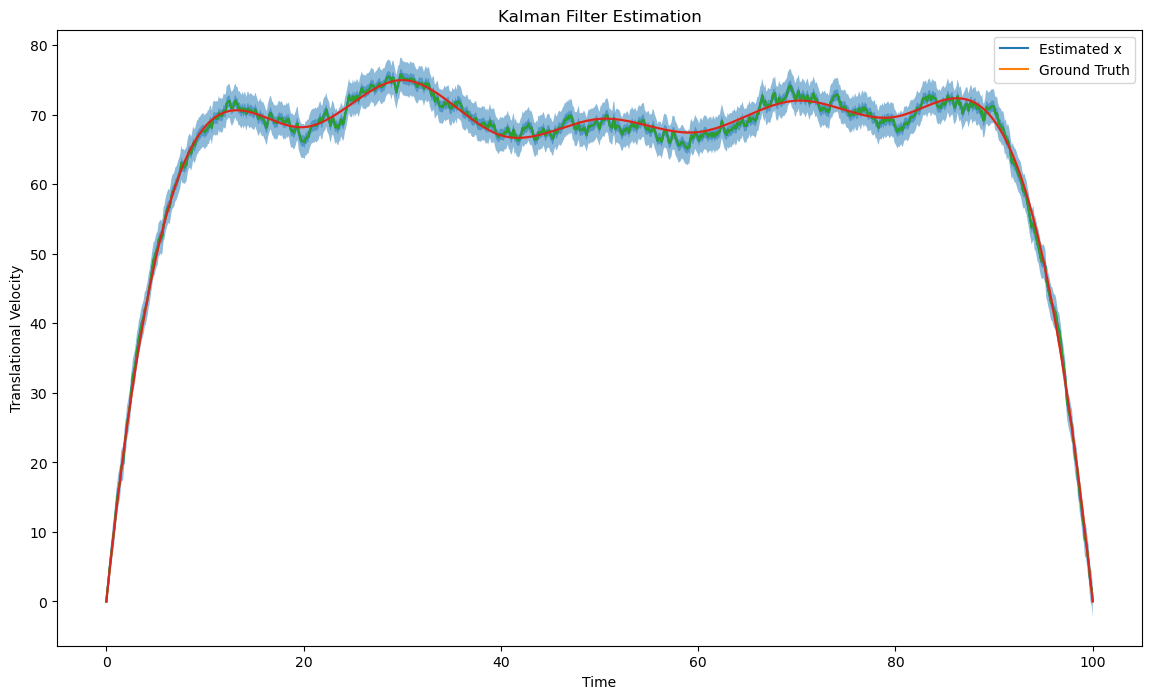

In [4]:
x = np.zeros(N)
P = np.zeros(N)
x_pred = np.zeros(N)
P_pred = np.zeros(N)

A = 1
B = dt
C = 1
Q = 5


for i in range(1, N):
    # Prediction Step
    x_pred[i] = A * x[i - 1] + B * u[i - 1]
    P_pred[i] = A * P[i - 1] * A  + R

    # Update Step
    K = P_pred[i] / (P_pred[i] + Q)
    x[i] = x_pred[i] + K * (z[i - 1] - x_pred[i])
    P[i] = (1 - K) * P_pred[i]
sigma = np.sqrt(P) 

handles = list()
minus_sigma = x - sigma
plus_sigma = x + sigma
plt.figure(figsize=(14,8))
handles.extend(ciplot(t, x, minus_sigma, plus_sigma, x_real))

three_sigma = 3 * sigma
minus_sigma = x - three_sigma
plus_sigma = x + three_sigma
handles.extend(ciplot(t, x, minus_sigma, plus_sigma, x_real))

plt.title('Kalman Filter Estimation')
plt.legend(handles, ['Estimated x', 'Ground Truth'])
plt.xlabel('Time')
plt.ylabel('Translational Velocity')
plt.show()